In [61]:
# Importer les librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
# Importer le dataset
dataset = pd.read_csv('datas/Mall_commercial__42__0.csv')
data_mall = dataset.copy()

In [63]:
data_mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39.0
1,2,Male,21,15,81.0
2,3,Female,20,16,6.0
3,4,Female,23,16,77.0
4,5,Female,31,17,40.0


In [64]:
data_mall.isnull()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [65]:
data_mall.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    2
dtype: int64

In [66]:
data_mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,198.000000
mean,100.500000,38.850000,60.560000,50.696970
std,57.879185,13.969007,26.264721,25.471575
min,1.000000,18.000000,15.000000,3.000000
25%,50.750000,28.750000,41.500000,35.000000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [67]:
data_mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Genre                   200 non-null    object 
 2   Age                     200 non-null    int64  
 3   Annual Income (k$)      200 non-null    int64  
 4   Spending Score (1-100)  198 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 7.9+ KB


In [68]:
data_mall = data_mall.fillna(0)
data_mall

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39.0
1,2,Male,21,15,81.0
2,3,Female,20,16,6.0
3,4,Female,23,16,77.0
4,5,Female,31,17,40.0
...,...,...,...,...,...
195,196,Female,35,120,79.0
196,197,Female,45,126,28.0
197,198,Male,32,126,74.0
198,199,Male,32,137,18.0


In [69]:
data_mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Genre                   200 non-null    object 
 2   Age                     200 non-null    int64  
 3   Annual Income (k$)      200 non-null    int64  
 4   Spending Score (1-100)  200 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 7.9+ KB


In [70]:
data_mall.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

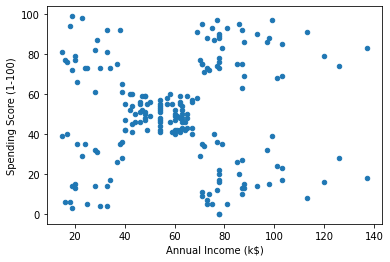

In [71]:
data_mall.plot.scatter(x="Annual Income (k$)",y="Spending Score (1-100)")

In [72]:
data_mall_f= data_mall.iloc[:, [3, 4]].values

In [73]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state=0)
    kmeans.fit(data_mall_f)
    wcss.append(kmeans.inertia_)

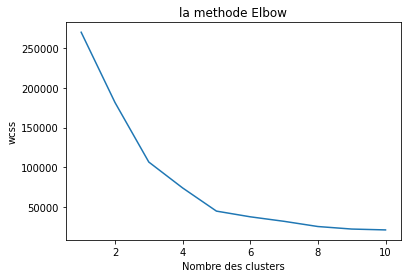

In [74]:
plt.plot(range(1, 11), wcss)
plt.title('la methode Elbow')
plt.xlabel('Nombre des clusters')
plt.ylabel('wcss')
plt.show()

In [75]:
modele = KMeans(n_clusters = 5, init = 'k-means++')
y_modele = modele.fit_predict(data_mall_f)

In [76]:
modele

KMeans(n_clusters=5)

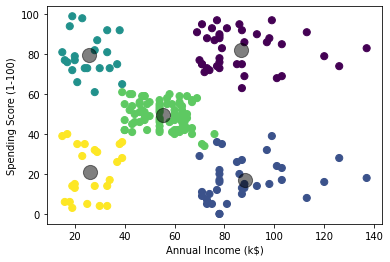

In [77]:
# phase de prédictions 
predictions_kmeans = modele.predict(data_mall_f)

#Affichage de la clusterisation 
plt.scatter(data_mall["Annual Income (k$)"], data_mall["Spending Score (1-100)"], c=predictions_kmeans, 
s=50, cmap='viridis') # couleur 'color map'
plt.xlabel("Annual Income (k$)") 
plt.ylabel("Spending Score (1-100)") 

#Affichage des centroïdes 
centers = modele.cluster_centers_ 
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, 
alpha=0.5) 
plt.show() 

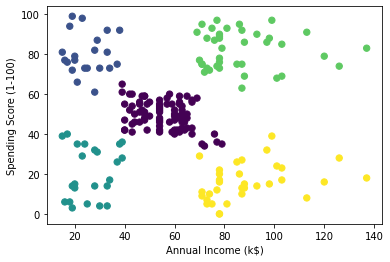

In [78]:
from sklearn import mixture
#Détermination des clusters
gmm = mixture.GaussianMixture(n_components=5)

#Apprentissage
gmm.fit(data_mall_f)

#Classification
clusters = gmm.predict(data_mall_f)

#Affichage des clusters

plt.scatter(data_mall["Annual Income (k$)"], data_mall["Spending Score (1-100)"], c=clusters, s=40,
cmap='viridis') # couleur 'color map'
plt.xlabel("Annual Income (k$)") 
plt.ylabel("Spending Score (1-100)") 
plt.show()